<h1 Style="font-family:Georgia, serif;">Exploratory Data Analysis on World Happiness Index Report </h1>
    <hr>

<h2 Style="font-family: serif;"> Introduction</h2>

 <h3> World Happiness Report: </h3>

<p style="font-family:Georgia, serif;">
The World Happiness Report is a landmark survey of the state of global happiness.The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions.Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations.
The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.</li>
</p>
<p style="font-family:Georgia, serif;">The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.
</p>

<h3> Objective:</h3>
<ul style="font-family:Georgia, serif;font-size:1.1em;line-height:1.75em;">
    <li>To identify trends in happiness index for various countries over the past years.</li>
    <li>To identify factors determining state of happiness in various countries.</li>
    <li>To study how much impact these factors have in happiness score of a country.</li>
    <li>To study and identify the reasons due to which some countries have low score.</li>
    <li>To identify the reason of why India is always at bottom over the past decade. </li>
    <li>To identify areas where India needs to work on to improve it's ranking.</li>
</ul>    

<h3>Importing Libraries:</h3>
<ul>
<li>
In this section We import all the libaries used in this Kernal.
</li>
</ul>

In [38]:
!pip install plotly
import plotly.io as pio
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
import plotly.express as px 
pd.options.mode.chained_assignment = None  # default='warn' 
%matplotlib inline

### Data Content: 
The happiness scores and rankings use data from the Gallup World Poll.
Gallup World Poll:
In 2005, Gallup began its World Poll, which continually surveys citizens in 160 countries, representing more than 98% of the world's adult population. The Gallup World Poll consists of more than 100 global questions as well as region-specific items. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors.

Ladder score:
Happiness score or subjective well-being. This is the national average response to the question of life evaluations.

Logged GDP per capita:
The GDP-per-capita time series from 2019 to 2020 using countryspecific forecasts of real GDP growth in 2020.

Social support:
Social support refers to assistance or support provided by members of social networks to an individual. </li>

Healthy life expectancy:
Healthy life expectancy is the average life in good health - that is to say without irreversible limitation of activity in daily life or incapacities - of a fictitious generation subject to the conditions of mortality and morbidity prevailing that year.

Freedom to make life choices:
Freedom to make life choices is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?” ... It is defined as the average of laughter and enjoyment for other waves where the happiness question was not asked

Generosity:
Generosity is the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita.

Perceptions of corruption:
The measure is the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?”

Ladder score in Dystopia:
It has values equal to the world’s lowest national averages. Dystopia as a benchmark against which to compare contributions from each of the six factors. Dystopia is an imaginary country that has the world's least-happy people. ... Since life would be very unpleasant in a country with the world's lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom, and least social support, it is referred to as “Dystopia,” in contrast to Utopia

World Happiness Report Official Website:<a href="https://worldhappiness.report/"> here </a>

<h3>Reading and Analysing Data:</h3>

<ul>
    <li>Past Records of WHR:</li>

In [39]:
# reading dataset
whr=pd.read_csv(r"Datasets/world-happiness-report.csv")

In [40]:
# Show Information of data  
whr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [41]:
# Show First five rows of data 
whr.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [42]:
# describe basic statistics of data
whr.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [43]:
# what all years data do we have 
whr['year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2007, 2020, 2006, 2005], dtype=int64)

In [44]:
# checking no of null values
def check_null(df):
    for col in df.columns:
        values = np.mean(df[col].isnull())
        print(f'{col} --- \t{values}% null values')
check_null(whr)    
# since no of null values are less than 1% we will ignore them

Country name --- 	0.0% null values
year --- 	0.0% null values
Life Ladder --- 	0.0% null values
Log GDP per capita --- 	0.018471010774756286% null values
Social support --- 	0.006670087224217547% null values
Healthy life expectancy at birth --- 	0.028219599794766546% null values
Freedom to make life choices --- 	0.016418676244227808% null values
Generosity --- 	0.045664443304258596% null values
Perceptions of corruption --- 	0.05643919958953309% null values
Positive affect --- 	0.011287839917906618% null values
Negative affect --- 	0.008209338122113904% null values


<li>WHR 2021:</li>

In [45]:
# read data:
whr21=pd.read_csv(r"Datasets/world-happiness-report-2021.csv")

In [46]:
# 2021 dataset 
whr21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [47]:
# show first five coloumn of data
whr21.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [48]:
# describe basic statistics of the data 
whr21.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [49]:
# checking null values 
check_null(whr21)
# No null values present ... Good to go

Country name --- 	0.0% null values
Regional indicator --- 	0.0% null values
Ladder score --- 	0.0% null values
Standard error of ladder score --- 	0.0% null values
upperwhisker --- 	0.0% null values
lowerwhisker --- 	0.0% null values
Logged GDP per capita --- 	0.0% null values
Social support --- 	0.0% null values
Healthy life expectancy --- 	0.0% null values
Freedom to make life choices --- 	0.0% null values
Generosity --- 	0.0% null values
Perceptions of corruption --- 	0.0% null values
Ladder score in Dystopia --- 	0.0% null values
Explained by: Log GDP per capita --- 	0.0% null values
Explained by: Social support --- 	0.0% null values
Explained by: Healthy life expectancy --- 	0.0% null values
Explained by: Freedom to make life choices --- 	0.0% null values
Explained by: Generosity --- 	0.0% null values
Explained by: Perceptions of corruption --- 	0.0% null values
Dystopia + residual --- 	0.0% null values


<h3 style="font-family: georgia,serif">Data Cleaning:</h3>

In [50]:
whr.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [51]:
whr21.columns
# contains few additional coloumns that we dont have in past years dataset 

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [52]:
# Renaming columns for easier access :

whr.rename(columns={'Country name':'country','Social support':'social support','Life Ladder':'score','Log GDP per capita':'gdp per capita','Healthy life expectancy at birth':'healthy life expectancy','Freedom to make life choices':'freedom','Generosity':'generosity','Perceptions of corruption':'corruption'},inplace=True)

In [53]:
# renameing columns for easier access :

whr21.rename(columns={'Country name':'country','Regional indicator':'region','Social support':'social support','Ladder score':'score','Logged GDP per capita':'gdp per capita','Healthy life expectancy':'healthy life expectancy','Freedom to make life choices':'freedom','Generosity':'generosity','Perceptions of corruption':'corruption'},inplace=True)
whr21

,country,region,score,Standard error of ladder score,upperwhisker,lowerwhisker,gdp per capita,social support,healthy life expectancy,freedom,generosity,corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [54]:
# removed un-needed columns :

whr21=whr21[['country','region','score','gdp per capita','social support','healthy life expectancy','generosity','freedom','corruption']]

In [55]:
# adding year column for 2021 dataset
whr21['year']=2021

In [56]:
# merging both data frames:

temp_reg = pd.merge(whr, whr21, how='outer',on='country')
whr['region']=temp_reg['region']

eda_happy = pd.merge(whr,whr21, how='outer',on=['country', 'year', 'score', 'gdp per capita','social support','healthy life expectancy','freedom','generosity','corruption','region'])

In [57]:
# rearranging columns

eda_happy=eda_happy[['region', 'country', 'year', 'score', 'gdp per capita', 'social support', 'healthy life expectancy', 'freedom','generosity', 'corruption', 'Positive affect', 'Negative affect']]

In [58]:
eda_happy.head()

,region,country,year,score,gdp per capita,social support,healthy life expectancy,freedom,generosity,corruption,Positive affect,Negative affect
0,South Asia,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,South Asia,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,South Asia,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,South Asia,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,South Asia,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [59]:
# Still less than 0.1% so we ignore
check_null(eda_happy)

region --- 	0.030028598665395614% null values
country --- 	0.0% null values
year --- 	0.0% null values
score --- 	0.0% null values
gdp per capita --- 	0.017159199237368923% null values
social support --- 	0.006196377502383222% null values
healthy life expectancy --- 	0.026215443279313633% null values
freedom --- 	0.015252621544327931% null values
generosity --- 	0.04242135367016206% null values
corruption --- 	0.052430886558627265% null values
Positive affect --- 	0.08150619637750238% null values
Negative affect --- 	0.0786463298379409% null values


Now our dataframe is ready!

# Analysis 

Let us see trends of happiness scores over past few years in a global view.

In [60]:
#Seems like we dont have appropriate data for 2005 - 2006 so we filter them out
px.choropleth(eda_happy[(eda_happy['year'] != 2005) &  (eda_happy['year'] != 2006)],locations='country',locationmode='country names',hover_name='country',color='score',animation_frame='year',projection='natural earth', title='Happiness Level in Countries over past years')

From the above plot, It can be observed that most of the countries/states present in North American & ANZ and the Western European regions have maintained a high levels of happiness throughtout many years.

Similarly, it can also be observed that most of the countries present in Sub-Saharan African, Asian & Southeast Asian regions have happiness levels fluctuating between low to medium. Indicating a lower score happiness score throughout many years.

We will see what were the factors leading to this!

Before we continue let us find out which countries are performing well in terms of happiness score and which countries are underperforming over the past few years.

To identify performance of these countries over past few years we first find average score of countries over the past years, based on which we classify the countries as happy or unhappy depending on their scores

In [61]:
# average score over the years
np.mean(eda_happy['score'])

5.47140228789323

Mean Score : 5

Therefore , Any country with average score above 5 can be considered happy and those with average score below 5 can be considered as Unhappy.

First of all lets see what counties have had good performance over the past years:

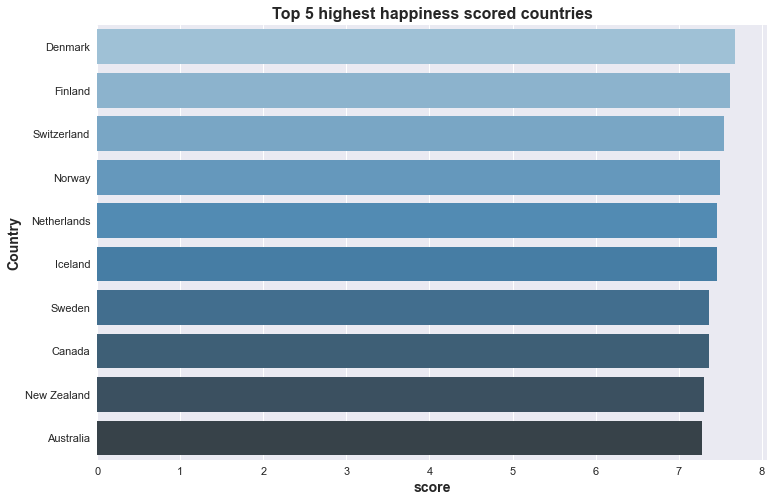

In [63]:
%matplotlib inline
# To see the top 10 highest and lowest countries we need to create plot data differently

top_happy = eda_happy.groupby('country', as_index=False)['score'].mean().sort_values(
    by='score',ascending=False)[:10]
top_unhappy = eda_happy.groupby('country', as_index=False)['score'].mean().sort_values(
    by='score', ascending=True)[:10]
top_unhappy =top_unhappy.sort_values(by='score', ascending=False)
plt.style.use('seaborn')
plt.figure(2, figsize=(12,8))
sns.barplot(data=top_happy, x='score', y='country',palette='Blues_d')
plt.xlabel('score',fontsize=14, fontweight='bold')
plt.ylabel('Country', fontsize=14, fontweight='bold')
plt.title('Top 5 highest happiness scored countries', fontsize=16, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# fig = plt.gcf()
plt.show()
# fig.savefig('top10happy.jpg')


From above plot, It can be observed that Denmark, Finland and Switzerland have had a great performance in terms of happiness score.
Also 7 out of top 10 most happiest countries are in Europe.

Now lets see what countries have lowest happiness index over past years.

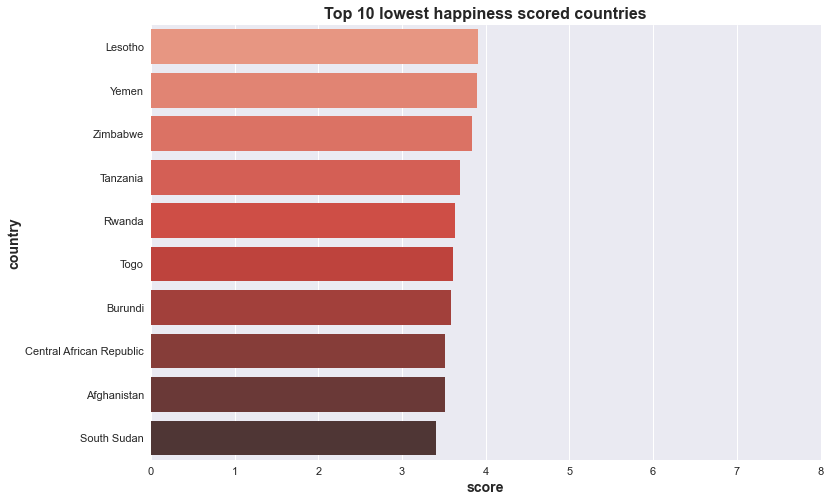

In [64]:
%matplotlib inline

plt.style.use('seaborn')
plt.figure(3, figsize=(12,8))
sns.barplot(data=top_unhappy, x='score', y='country',palette='Reds_d')
plt.xlabel('score',fontsize=14, fontweight='bold')
plt.ylabel('country', fontsize=14, fontweight='bold')
plt.title('Top 10 lowest happiness scored countries', fontsize=16, fontweight='bold')
plt.xlim(0,8)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# plt.axes.grid(color='white')
# ax = plt.gca()
# ax.set_facecolor("#2e3141")

# fig = plt.gcf()
plt.show()
# fig.savefig('top10unhappyt.jpg', bbox_inches='tight')


From the above graph we can see that South Sudan has the lowest mean happiness level scores throughtout all the years

Before we continue, lets see if we can see region wise performance of these countries.


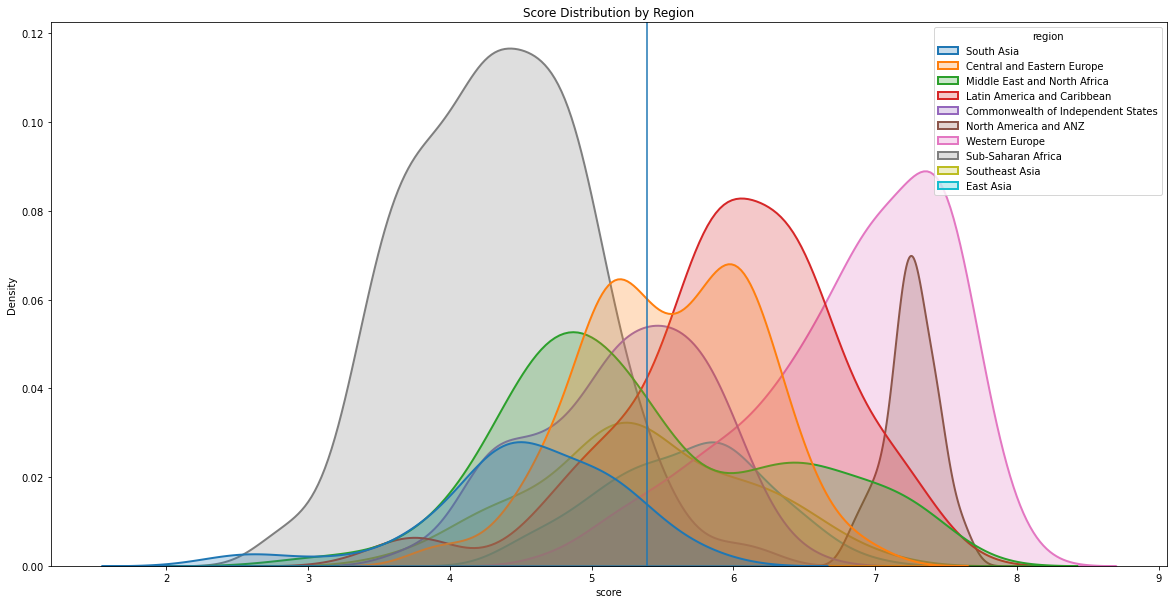

In [24]:
plt.figure(figsize=(20,10))
sns.kdeplot(eda_happy["score"],hue=eda_happy['region'], fill=True, linewidth=2)
plt.axvline(eda_happy["score"].median())
plt.title("Score Distribution by Region")
plt.show()